In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

https://www.kaggle.com/datasets/anmolkumar/house-price-prediction-challenge?select=train.csv

In [2]:
# Attributes Description:

# RERA: Real Estate Regulatory Authority.  Approved or not.
# BHK_NO: Number of rooms.
# TARGET(PRICE_IN_LACS): price in indian rupee. 1 lacs - 100 000 rupees.

In [2]:
df = pd.read_csv(r"C:\Users\lasth\Desktop\jupyter_folder_main\all files for jupyter, pandas\train_house_price_predcit.csv")
print(df.shape)
df.head() 

(29451, 12)


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [3]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [12]:
# or like that:
df.isnull().values.any()

False

In [61]:
# The last element of the Address column is a city. Let's extract it from the column.
df['city'] = df["ADDRESS"].map(lambda x: x.split(",")[-1])

# Delete the column Address as we don't need it anymore.
df.drop(columns=['ADDRESS'], inplace=True)
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,Kolkata


In [62]:
len(df["city"].unique())

256

In [63]:
# Let's identify the cities who have occurred fewer than 11 times.
cities = df['city'].value_counts()
cities

Bangalore      4340
Lalitpur       2993
Mumbai         2023
Pune           1991
Noida          1767
               ... 
Bhadrak           1
Kurukshetra       1
Dibrugarh         1
Sagar             1
Washim            1
Name: city, Length: 256, dtype: int64

In [64]:
cities[cities < 11]

Karnal         10
Wardha         10
Puri           10
Kanchipuram    10
Latur          10
               ..
Bhadrak         1
Kurukshetra     1
Dibrugarh       1
Sagar           1
Washim          1
Name: city, Length: 146, dtype: int64

In [65]:
# Now we will gather those cities who appeared fewer than 11 times into one group called 'other'.
df['city'] = df['city'].map(lambda x: 'other' if x in cities[cities < 11] else x)
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,Kolkata


In [66]:
# Now, the number of unque cities (future features) is smaller.
len(df['city'].unique())

111

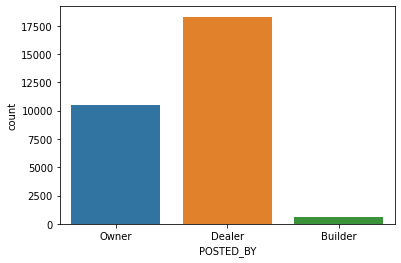

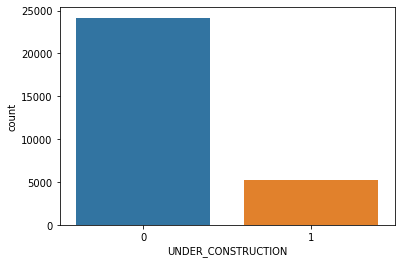

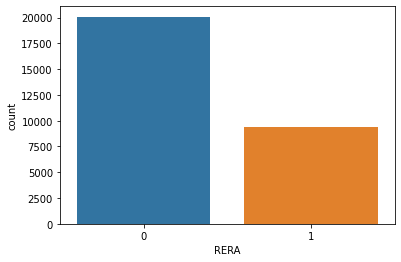

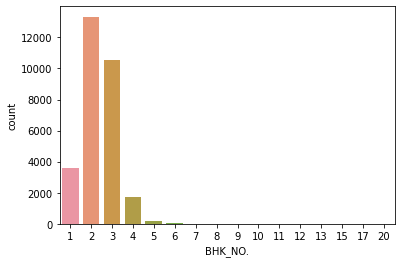

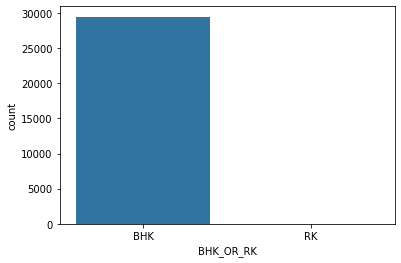

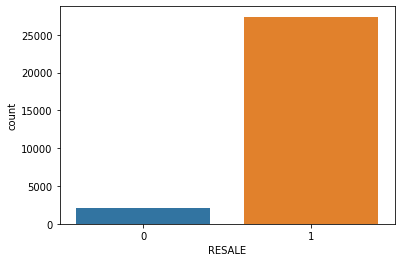

In [10]:
# Visualizing some variables.
for i in ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'RESALE']:
    sns.countplot(x=df[i])
    plt.show()

In [11]:
# These two variables are perfectly correlated. So, we can drop one of them.
df[['UNDER_CONSTRUCTION', 'READY_TO_MOVE']].corr()

,UNDER_CONSTRUCTION,READY_TO_MOVE
UNDER_CONSTRUCTION,1.0,-1.0
READY_TO_MOVE,-1.0,1.0


In [12]:
df.drop(columns=['READY_TO_MOVE'], inplace=True)
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city
0,Owner,0,0,2,BHK,1300.236407,1,12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,1,22.592200,88.484911,60.5,Kolkata


In [13]:
# Encoding categorical variables.
df2 = pd.get_dummies(df, columns=['city', 'POSTED_BY', 'BHK_OR_RK'], drop_first=True)
df2

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city_Ahmednagar,city_Ajmer,...,city_Valsad,city_Vapi,city_Varanasi,city_Vijayawada,city_Visakhapatnam,city_Vizianagaram,city_other,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
0,0,0,2,1300.236407,1,12.969910,77.597960,55.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,2,1275.000000,1,12.274538,76.644605,51.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,2,933.159722,1,12.778033,77.632191,43.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,2,929.921143,1,28.642300,77.344500,62.5,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,2,999.009247,1,22.592200,88.484911,60.5,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,27.140626,78.043277,45.0,0,0,...,0,0,0,0,0,0,0,0,1,0
29447,0,0,2,769.230769,1,39.945409,-86.150721,16.0,0,0,...,0,1,0,0,0,0,0,0,1,0
29448,0,0,2,1022.641509,1,26.928785,75.828002,27.1,0,0,...,0,0,0,0,0,0,0,1,0,0
29449,0,0,2,927.079009,1,12.900150,80.227910,67.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
# Separating feature variables and a target variable.
X = df2.drop(columns=['TARGET(PRICE_IN_LACS)'])
y = df2['TARGET(PRICE_IN_LACS)']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.8872038588636246

In [18]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9390379498665163

In [19]:
# Decision Tree and Random Forest perform extremely well.

In [20]:
y_predict = rf.predict(X_test)

In [21]:
len(y_predict)

5891

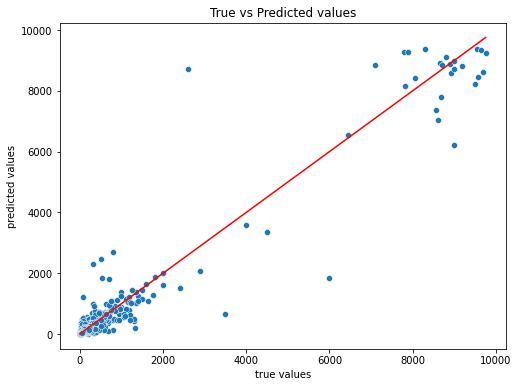

In [22]:
# Visualizing actual vs predicted values from Random Forest model.
plt.figure(figsize=(8,6))

sns.scatterplot(x=y_test, y=y_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red')

plt.title('True vs Predicted values')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.show()

In [23]:
# Linear regression model works extremely poor.
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.09349591932896861

# Applying log tranformation and then testing the same models

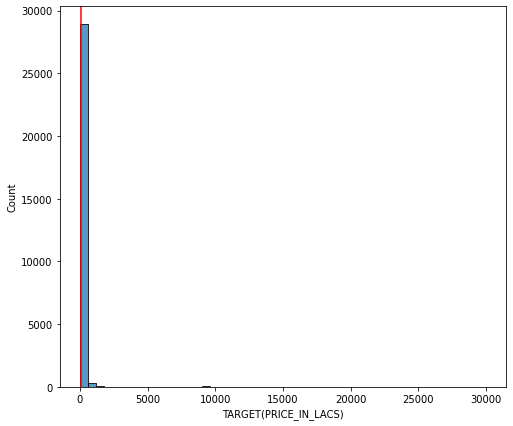

In [24]:
# Let's investigate our price and square_feet variables.
plt.figure(figsize=(8,7))
sns.histplot(df2['TARGET(PRICE_IN_LACS)'], bins=50)
plt.axvline(df2['TARGET(PRICE_IN_LACS)'].median(), 0, 1, color='red')

plt.show()

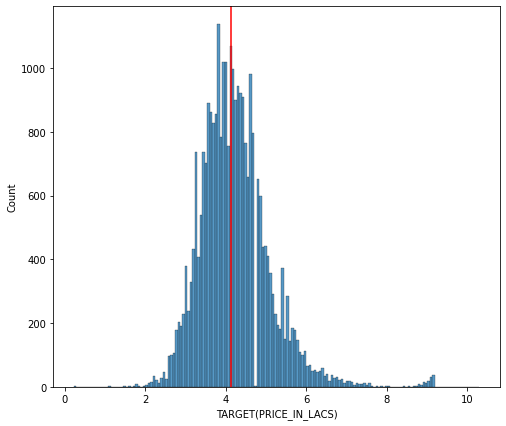

In [25]:
# Applying log tranformation.
plt.figure(figsize=(8,7))

sns.histplot(np.log(df2['TARGET(PRICE_IN_LACS)'] + 1)) # adding 1 to avoid negative values
plt.axvline(np.log(df2['TARGET(PRICE_IN_LACS)']).median(), 0, 1, color='red')
plt.show()

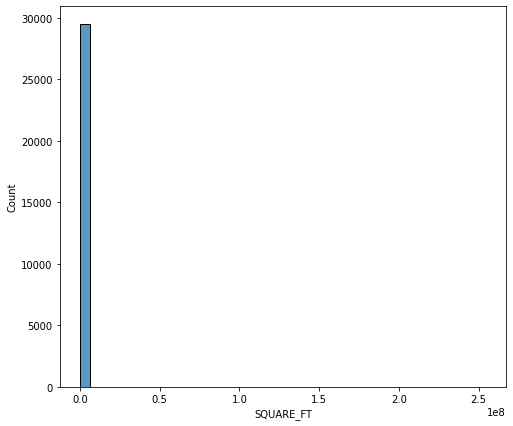

In [26]:
plt.figure(figsize = (8,7))
sns.histplot(df2['SQUARE_FT'], bins=40)
plt.show()

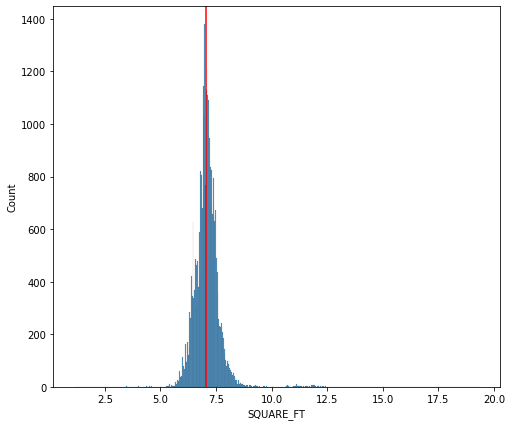

In [27]:
plt.figure(figsize = (8,7))

sns.histplot(np.log(df2['SQUARE_FT']))
plt.axvline(np.log(df2['SQUARE_FT']).median(), 0, 1, color='red')
plt.show()

In [28]:
df_log = df2.copy(deep=True)

df_log['TARGET(PRICE_IN_LACS)'] = np.log(df_log['TARGET(PRICE_IN_LACS)'] + 1)
df_log['SQUARE_FT'] = np.log(df_log['SQUARE_FT'])
df_log.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city_Ahmednagar,city_Ajmer,...,city_Valsad,city_Vapi,city_Varanasi,city_Vijayawada,city_Visakhapatnam,city_Vizianagaram,city_other,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
0,0,0,2,7.170301,1,12.969910,77.597960,4.025352,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,2,7.150701,1,12.274538,76.644605,3.951244,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,2,6.838576,1,12.778033,77.632191,3.784190,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,2,6.835100,1,28.642300,77.344500,4.151040,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,2,6.906764,1,22.592200,88.484911,4.119037,0,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
X = df_log.drop(columns=['TARGET(PRICE_IN_LACS)'])
y = df_log['TARGET(PRICE_IN_LACS)']

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
cross_val_score(DecisionTreeRegressor(), X, y, cv=3).mean()

0.7499205443208417

In [32]:
cross_val_score(RandomForestRegressor(), X, y, cv=3)

array([0.86666667, 0.84240176, 0.84346773])

In [33]:
cross_val_score(LinearRegression(), X, y, cv=3)

array([0.76293142, 0.76342084, 0.73844324])

In [34]:
cross_val_score(Ridge(), X, y, cv=3)

array([0.7631264 , 0.76336037, 0.73841901])

In [35]:
# This time Random Forest performs the best. However, it worked even better on initial values (0.96).
# This time Logistic Regression showed a much better result.